<img src="./logo_UTN.svg" align="right" width="150" /> 

#### Teoría de los Circuitos 2

# Trabajo Semanal 7

### Jorge Andres Niño


## Consigna

Resolver los puntos mostrados a continuación:

![*Figura 8*](Ejercicio.png)

![*Figura 8*](Ejercicio2.png)

### Resolución

A continuación se muestra la solución a ambos ejercicios:

In [5]:
from IPython.display import IFrame, display
IFrame("./ej1_ts7.pdf", width=1000, height=1000)

In [6]:
from IPython.display import IFrame, display
IFrame("./ej2_ts7.pdf", width=1000, height=1000)

In [1]:
from IPython.display import IFrame, display
IFrame("./mai_ts7.pdf", width=1000, height=1000)

### Respuesta en frecuencia, fase y diagrama de polos y ceros.

A continuación vamos a simular en python la función transferencia obtenida, para los parametros pedidos, y luego verificaremos con LTSPICE, lo obtenido en la simulación numerica, del ejercicio 2.

In [1]:
# PyTC2: La librería para TC2
from pytc2.sistemas_lineales import pzmap, GroupDelay, bodePlot, analyze_sys, pretty_print_bicuad_omegayq, pretty_print_lti, tf2sos_analog, pretty_print_SOS

from scipy import signal as Funcion
import numpy as np
import matplotlib.pyplot as plt
# Módulos para Jupyter

import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt


<IPython.core.display.Math object>

<IPython.core.display.Math object>

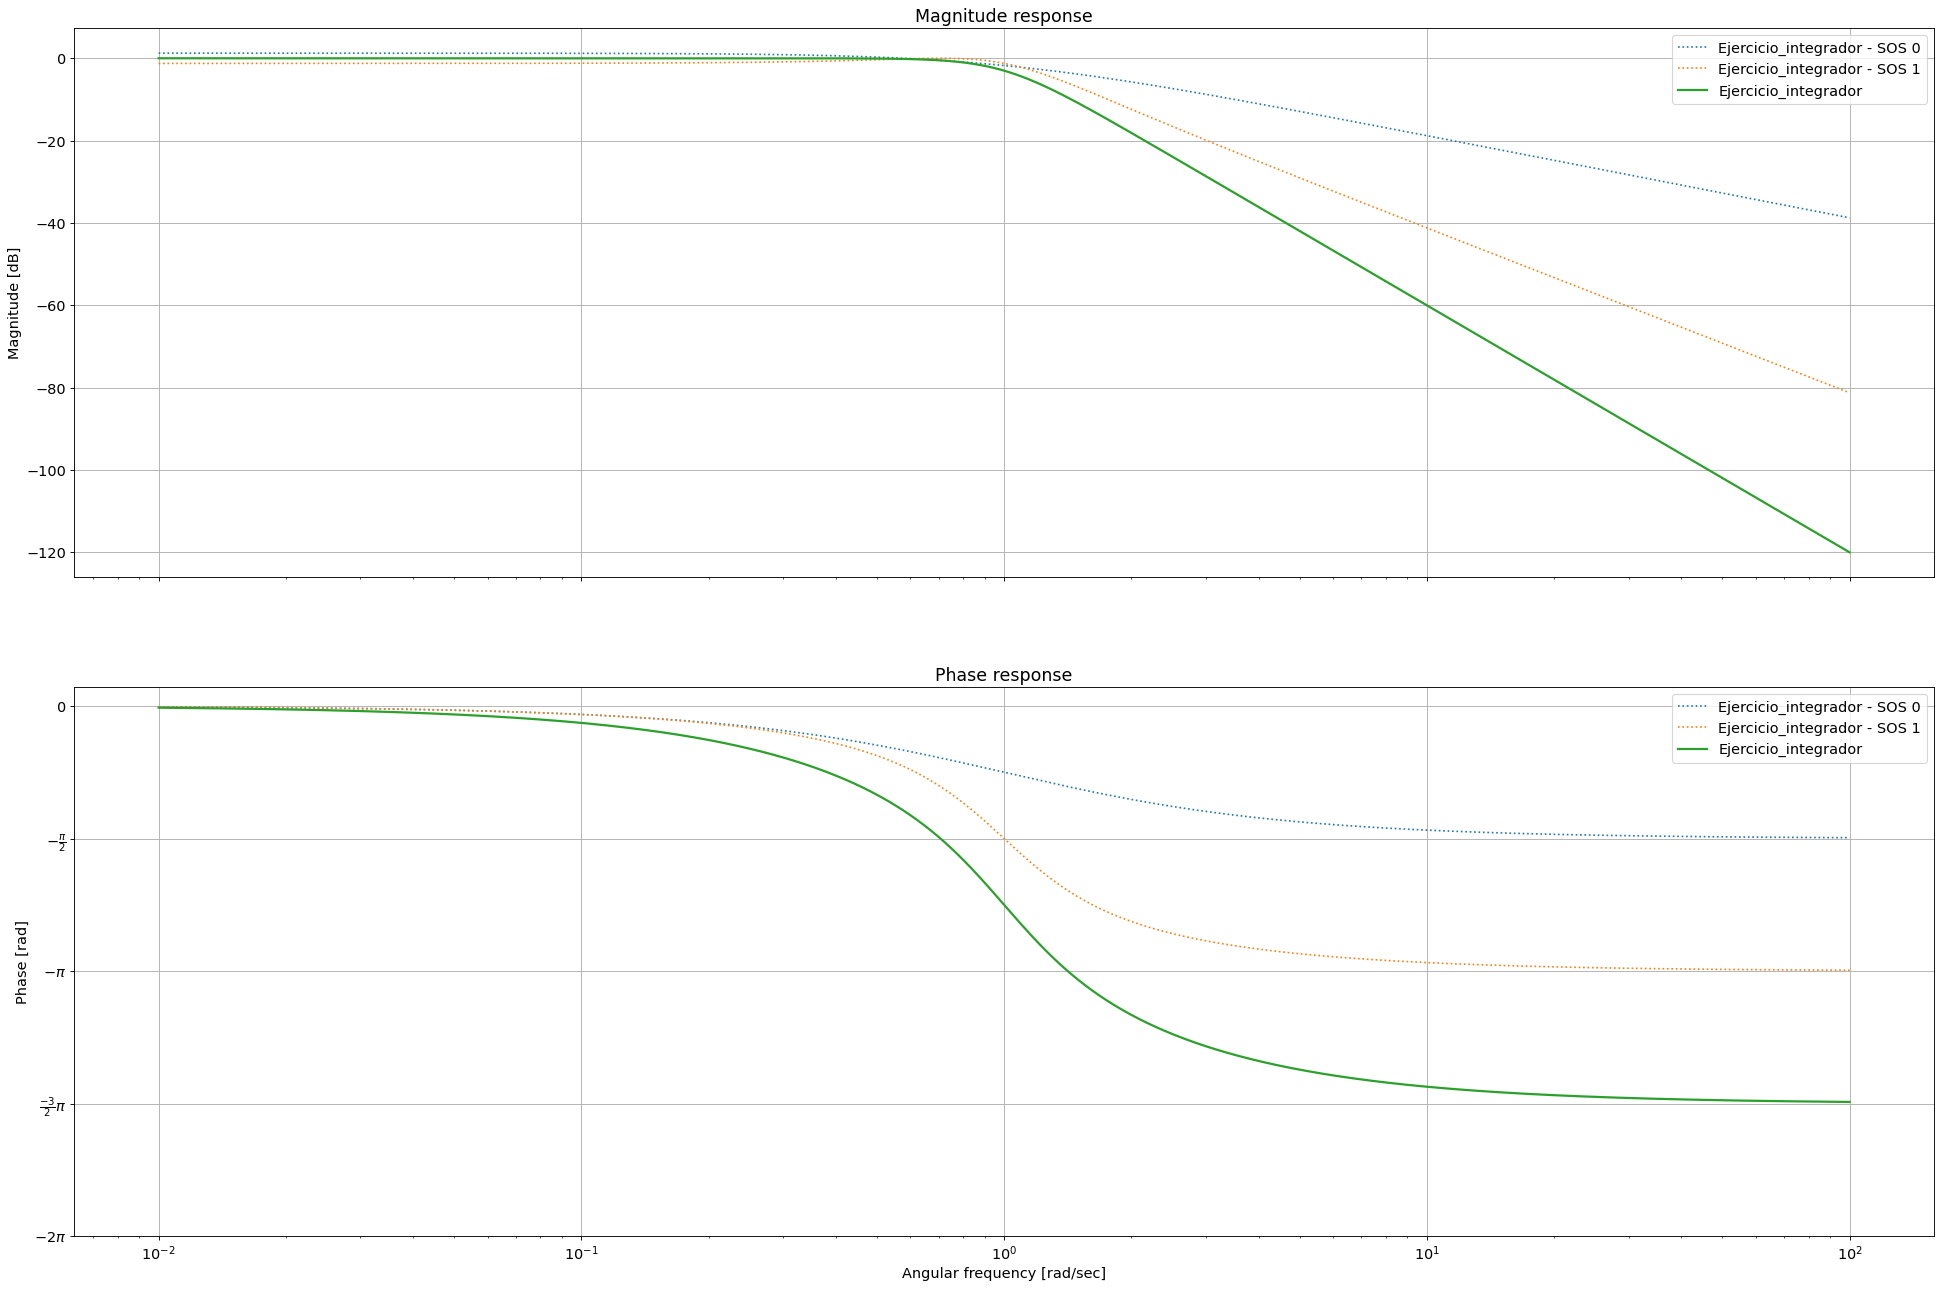

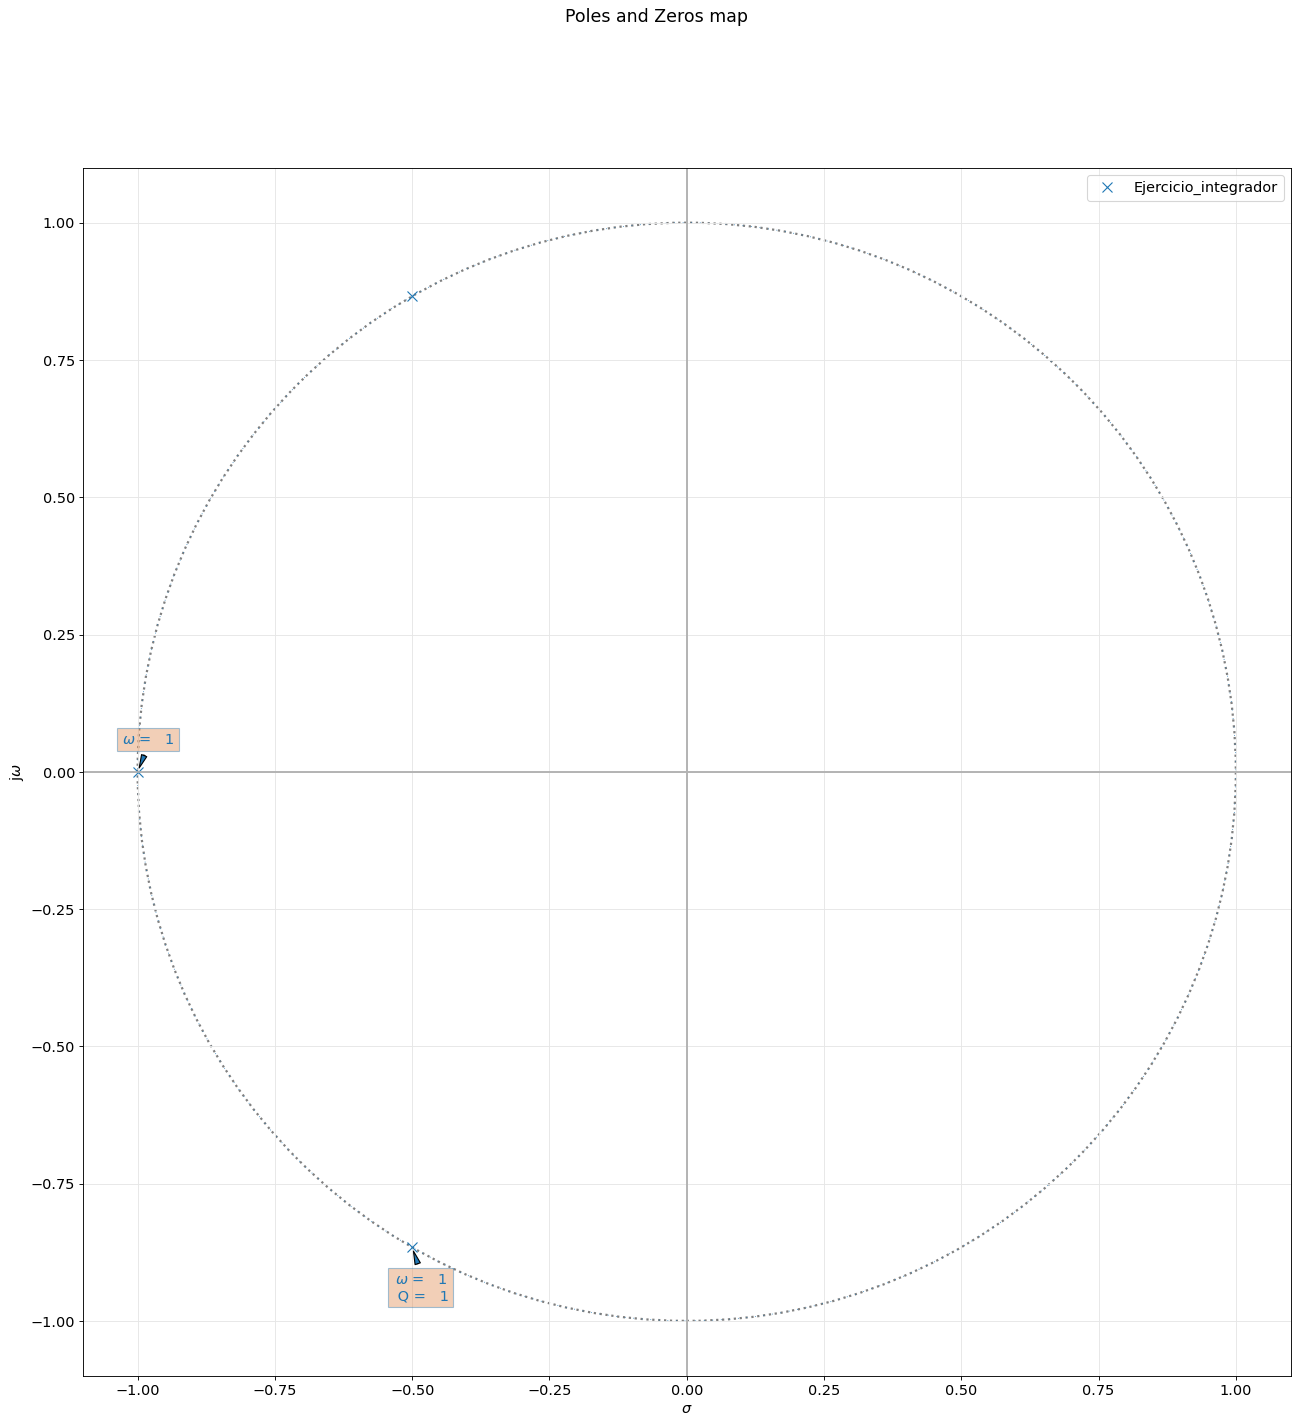

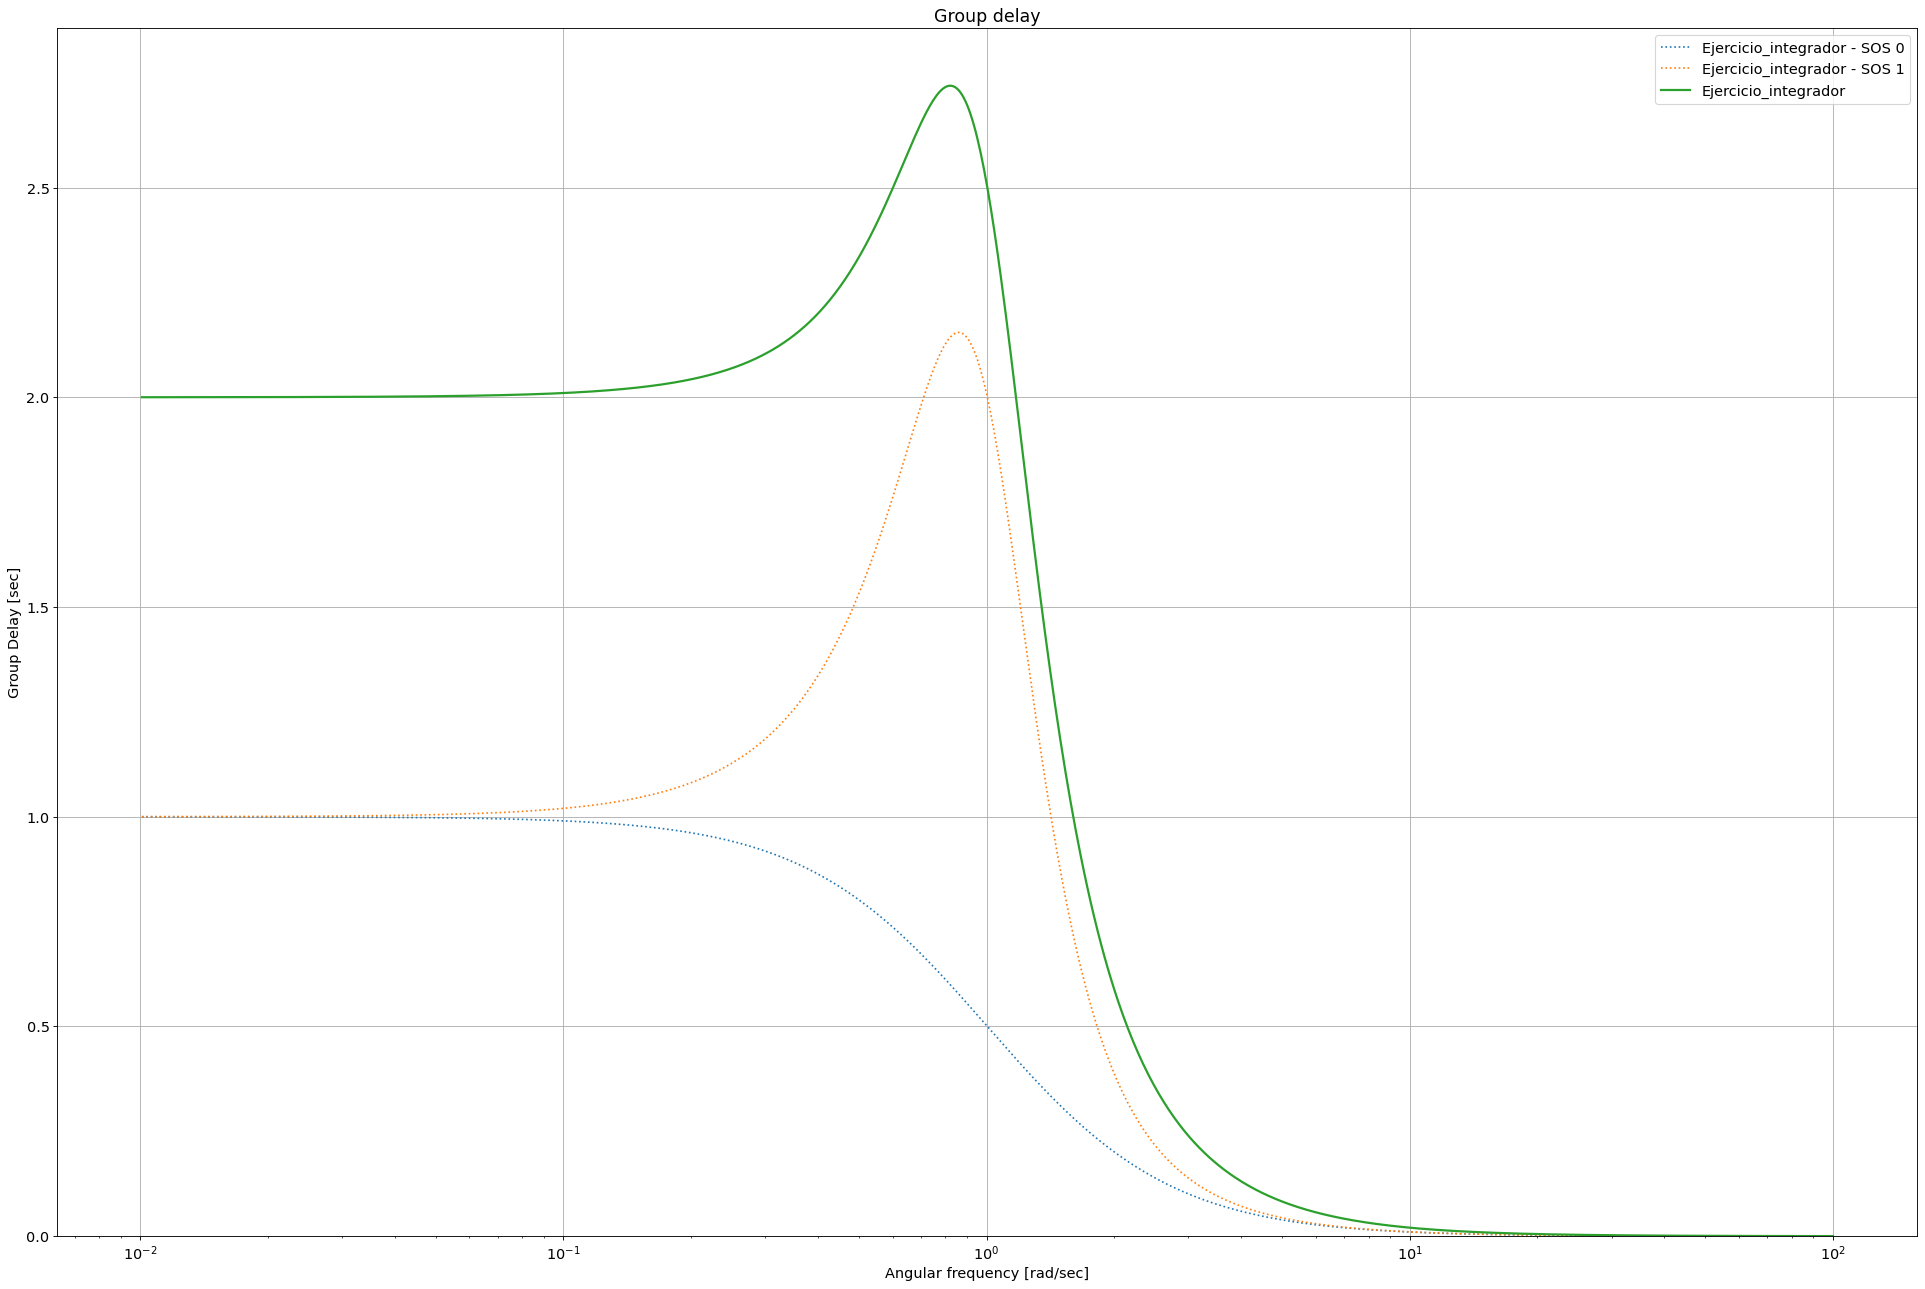

In [4]:
#%% Funcion trasnferencia prototipo:
w0 = 1
wn =3
num1= np.array([1])
den1 = np.array([w0**3,2*w0**2, 2*w0, 1])
H1 = Funcion.TransferFunction( num1, den1 )
pretty_print_lti(num1, den1)
fig_sz_x = 30
fig_sz_y = 20
fig_dpi = 80 # dpi
fig_font_size = 13

mpl.rcParams['figure.figsize'] = (fig_sz_x, fig_sz_y)
mpl.rcParams['figure.dpi'] = fig_dpi
plt.rcParams.update({'font.size':fig_font_size})

# particiono en SOS's para la implementación
sos_hp = tf2sos_analog(num1, den1)
pretty_print_SOS(sos_hp)
# Graficamos el diagrama de polos y ceros
# Graficamos la respuesta en frecuencia para el modulo y la fase.
analyze_sys(sos_hp, 'Ejercicio_integrador')

Podemos observar que la respuesta es la de un pasabajos con atenuación 60 $db/decada$.

## Simulaciones

A continuación podemos emplear la estructura bicuad mencionada en el planteo del problema, para sintetizar una de las funciones SOS de tal manera de obtener la bicuadratica y luego mediante un simple RC pasa altos obtener la misma respuesta que el circuito anterior.

![*Figura 8*](ej_1_cir.png)

![*Figura 8*](ej_1_sim.png)

![*Figura 8*](ej_2_cir.png)

![*Figura 8*](ej_2_sim.png)

Como podemos observar, los valores de los parametros Z de la simulación coinciden con el valor calculado mediante el método de nodos.
En el caso del ejercicio 2, podemos observar que la respuesta en frecuencia coincide con la calculada y con la simulada en python.

# Conclusiones:
 

* El método de calculo a partir de matriz de parametros es util en tanto y en cuanto podamos definir una matriz lineal sin embargo hay casos en los cuales no podemos evitar hacer análisis de nodos. De todas maneras en el caso del transformador, al usar un transformador ideal (algo puramente teórico) la limitación no sería tan importante
* Mediante los métodos de interconexión de cuadripolos pudimos calcular muy facilmente la función transferencia de un circuito con una carga definida, al igual que con MAI. Estos métodos permiten operar de forma mas sistematica y obtener la función transferencia deseada, mediante simples operaciones matriciales. 